In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
from tqdm import *
from scipy import spatial
import matplotlib.gridspec as gridspec
import stats

cdm = h5py.File('Data/COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5', 'r')

cdm_galaxy = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm_galaxy = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm,wdm,cdm_galaxy,wdm_galaxy)

<HDF5 file "COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


# Access the masses and positions of CDM and WDM halos

In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm['SubhaloMass'][:]
cdm_position = cdm['SubhaloPos'][:]

wdm_mass = wdm['SubhaloMass'][:]
wdm_position = wdm['SubhaloPos'][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos'] ['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos']


(array([1.87617493e+14, 1.84468594e+14, 6.89978024e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [17.94562721, 79.86347961, 53.3843956 ],
        [15.62266159, 78.18474579, 52.83857346],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.89941540e+14, 1.86912732e+14, 6.83256610e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [1.09048624e+01, 8.12610779e+01, 5.48179703e+01],
        [1.56323385e+01, 7.81665344e+01, 5.28157997e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Filter out central halos below the resolution limit

In [3]:
m_res = 8.8*10**6*50
m_res

440000000.0

In [4]:
# find the indices of all the central halos above the resolution limit
cdm_central_ind = np.where((cdm['IsCentral'][:] == 1)&(cdm_mass>m_res))[0]

print(cdm_central_ind)
print(cdm['IsCentral'][:][cdm_central_ind])

wdm_central_ind = np.where((wdm['IsCentral'][:] == 1)&(wdm_mass>m_res))[0]

[      0   20093   40287 ... 2633808 2633809 2633811]
[1 1 1 ... 1 1 1]


In [5]:
#access the central positions
cdm_position_central=cdm_position[cdm_central_ind]
wdm_position_central=wdm_position[wdm_central_ind]

#and the central masses
cdm_mass_central=cdm_mass[cdm_central_ind]
wdm_mass_central=wdm_mass[wdm_central_ind]

len(cdm_mass_central)

1686837

# Access the positions of CDM and WDM galaxies

In [6]:
print(list(cdm_galaxy.keys()),list(wdm_galaxy.keys()))

cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]

cdm_galaxy_position, wdm_galaxy_position

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([[17.43208122, 80.25539398, 54.00876999],
        [17.43210793, 80.22522736, 53.97425079],
        [19.06316185, 80.02703857, 54.18655014],
        ...,
        [67.22305298, 64.69418335, 36.19010544],
        [ 7.28926134, 78.05925751, 49.41135025],
        [ 6.75961494, 77.04682159, 48.55372238]]),
 array([[17.61932182, 79.06235504, 52.68593979],
        [18.65647697, 80.58162689, 52.30108261],
        [18.58250046, 80.91363525, 52.45199203],
        ...,
        [76.68208313, 28.50509262, 59.96631622],
        [33.62237167,  9.74790382,  4.82571173],
        [52.58901978, 44.79496765, 78.47211456]]))

# Calculate the mass within a sphere

In [8]:
#create the trees
cdm_central_tree = spatial.cKDTree(cdm_position_central)
wdm_central_tree = spatial.cKDTree(wdm_position_central)

### First do CDM

In [9]:
# create an empty array for the mass of the spheres
cdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all central halos in a 5 Mpc radius around each galaxy
    ind = cdm_central_tree.query_ball_point(cdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    cdm_5Mpc_sphere_mass.append(np.sum(cdm_mass_central[ind]))

100%|████████████████████████████████████████████████████████████████████████| 661632/661632 [07:14<00:00, 1522.58it/s]


In [11]:
cdm_5Mpc_sphere_mass=np.array(cdm_5Mpc_sphere_mass)
np.savetxt("Calculations/cdm_5Mpc_sphere_mass.txt", cdm_5Mpc_sphere_mass, fmt = "%f")
len(cdm_5Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

In [12]:
# create an empty array for the mass of the spheres
cdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all central halos in a 10 Mpc radius around each galaxy
    ind = cdm_central_tree.query_ball_point(cdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    cdm_10Mpc_sphere_mass.append(np.sum(cdm_mass_central[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 661632/661632 [30:05<00:00, 366.54it/s]


In [13]:
cdm_10Mpc_sphere_mass=np.array(cdm_10Mpc_sphere_mass)
np.savetxt("Calculations/cdm_10Mpc_sphere_mass.txt", cdm_10Mpc_sphere_mass, fmt = "%f")
len(cdm_10Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

### Then WDM

In [14]:
# create an empty array for the mass of the spheres
wdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all central halos in a 5 Mpc radius around each galaxy
    ind = wdm_central_tree.query_ball_point(wdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    wdm_5Mpc_sphere_mass.append(np.sum(wdm_mass_central[ind]))

100%|████████████████████████████████████████████████████████████████████████| 477870/477870 [03:43<00:00, 2138.62it/s]


In [15]:
wdm_5Mpc_sphere_mass=np.array(wdm_5Mpc_sphere_mass)
np.savetxt("Calculations/wdm_5Mpc_sphere_mass.txt", wdm_5Mpc_sphere_mass, fmt = "%f")
len(wdm_5Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

In [16]:
# create an empty array for the mass of the spheres
wdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all central halos in a 10 Mpc radius around each galaxy
    ind = wdm_central_tree.query_ball_point(wdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    wdm_10Mpc_sphere_mass.append(np.sum(wdm_mass_central[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 477870/477870 [15:30<00:00, 513.72it/s]


In [17]:
wdm_10Mpc_sphere_mass=np.array(wdm_10Mpc_sphere_mass)
np.savetxt("Calculations/wdm_10Mpc_sphere_mass.txt", wdm_10Mpc_sphere_mass, fmt = "%f")
len(wdm_10Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

# Calculate the envelope mass

In [7]:
cdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_5Mpc_sphere_mass.txt")
wdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_5Mpc_sphere_mass.txt")

In [8]:
cdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_10Mpc_sphere_mass.txt")
wdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_10Mpc_sphere_mass.txt")

In [9]:
cdm_envelope_mass=cdm_10Mpc_sphere_mass-cdm_5Mpc_sphere_mass
wdm_envelope_mass=wdm_10Mpc_sphere_mass-wdm_5Mpc_sphere_mass
len(cdm_envelope_mass),len(wdm_envelope_mass),cdm_envelope_mass, wdm_envelope_mass

(661632,
 477870,
 array([4.32517034e+14, 4.32810365e+14, 4.48681308e+14, ...,
        6.60830481e+13, 4.33982272e+14, 4.16367482e+14]),
 array([2.81686911e+14, 2.20405763e+14, 2.65681151e+14, ...,
        1.10485245e+14, 7.16709932e+13, 4.46257747e+13]))

# Compare the total galaxy abundance

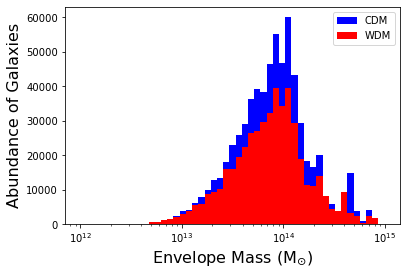

In [10]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
plt.hist(cdm_envelope_mass,bins=bins,label='CDM',color='blue')
plt.hist(wdm_envelope_mass,bins=bins,label='WDM',color='red')
plt.xlabel("Envelope Mass (M$_{\odot}$)", fontsize=16)
plt.ylabel('Abundance of Galaxies',fontsize=16)
plt.xscale("Log")
plt.legend()
plt.show()

### Split the environment into the top 20% and bottom 20%

In [11]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass,frac)
th_top_cdm = np.percentile(cdm_envelope_mass,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass,frac)
th_top_wdm = np.percentile(wdm_envelope_mass,100.-frac)

cdm_top_envelope_mass = cdm_envelope_mass[cdm_envelope_mass>th_top_cdm]
cdm_low_envelope_mass = cdm_envelope_mass[cdm_envelope_mass<th_low_cdm]
wdm_top_envelope_mass = wdm_envelope_mass[wdm_envelope_mass>th_top_wdm]
wdm_low_envelope_mass = wdm_envelope_mass[wdm_envelope_mass<th_low_wdm]

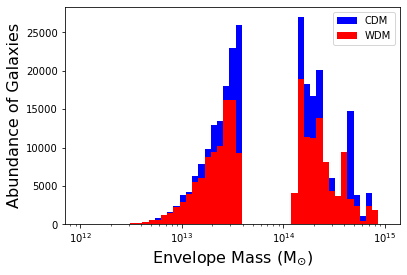

In [12]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_envelope_mass, bins=bins,label='CDM',color='blue')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_envelope_mass,bins=bins,color='blue')
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_envelope_mass, bins=bins,label='WDM',color='red')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_envelope_mass,bins=bins,color='red')
plt.xlabel("Envelope Mass (M$_{\odot}$)", fontsize=16)
plt.ylabel('Abundance of Galaxies',fontsize=16)
plt.xscale("Log")
plt.legend()
plt.show()

# Compute the Stellar Mass Function for galaxies in over/underdensities
### Access the masses of CDM and WDM galaxies

In [13]:
cdm_galaxy_mass = cdm_galaxy['StellarMass'][:]
wdm_galaxy_mass = wdm_galaxy['StellarMass'][:]

cdm_galaxy_mass, wdm_galaxy_mass

(array([2.37800096e+08, 1.14038586e+03, 4.39743280e+07, ...,
        6.31516409e+00, 3.49365275e+06, 2.19290527e+04]),
 array([3873670.  , 5328977.  , 1002360.25, ..., 2697151.5 ,  542400.5 ,
        2462471.  ]))

### Split the galaxies into the top 20% and bottom 20%

In [14]:
cdm_top_galaxy_mass = cdm_galaxy_mass[cdm_envelope_mass>th_top_cdm]
cdm_low_galaxy_mass = cdm_galaxy_mass[cdm_envelope_mass<th_low_cdm]
wdm_top_galaxy_mass = wdm_galaxy_mass[wdm_envelope_mass>th_top_wdm]
wdm_low_galaxy_mass = wdm_galaxy_mass[wdm_envelope_mass<th_low_wdm]

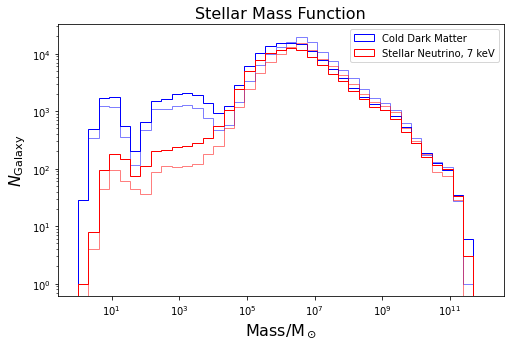

In [15]:
# Create a histogram
bins = np.logspace(0, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_galaxy_mass,label='Cold Dark Matter',color='blue',
                                                bins=bins, log = True, histtype = 'step')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_galaxy_mass,color='blue', log = True,bins=bins,
                                                histtype = 'step',alpha=0.5)
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_galaxy_mass,label='Stellar Neutrino, 7 keV',
                                                bins=bins, color='red', log = True, histtype = 'step')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_galaxy_mass,color='red',bins=bins, log = True, 
                                                histtype = 'step',alpha=0.5)
plt.title("Stellar Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Galaxy}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()

plt.show()

### Filter out galaxies < 10$^6$ M$_\odot$

In [16]:
# filter out galaxies less than 10^6 solar masses
cdm_envelope_mass_filtered=cdm_envelope_mass[cdm_galaxy_mass>10**6]
wdm_envelope_mass_filtered=wdm_envelope_mass[wdm_galaxy_mass>10**6]

cdm_galaxy_mass_filtered=cdm_galaxy_mass[cdm_galaxy_mass>10**6]
wdm_galaxy_mass_filtered=wdm_galaxy_mass[wdm_galaxy_mass>10**6]

len(cdm_galaxy_mass),len(cdm_galaxy_mass_filtered)

(661632, 407397)

In [17]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass_filtered,frac)
th_top_cdm = np.percentile(cdm_envelope_mass_filtered,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass_filtered,frac)
th_top_wdm = np.percentile(wdm_envelope_mass_filtered,100.-frac)

cdm_top_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered<th_low_wdm]

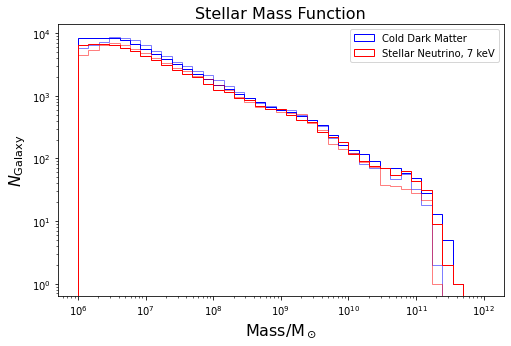

In [18]:
# Create a histogram
bins = np.logspace(6, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_galaxy_mass_filtered,label='Cold Dark Matter',color='blue',
                                                bins=bins, log = True, histtype = 'step')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_galaxy_mass_filtered,color='blue', log = True,bins=bins,
                                                histtype = 'step',alpha=0.5)
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_galaxy_mass_filtered,label='Stellar Neutrino, 7 keV',
                                                bins=bins, color='red', log = True, histtype = 'step')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_galaxy_mass_filtered,color='red',bins=bins, log = True, 
                                                histtype = 'step',alpha=0.5)
plt.title("Stellar Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Galaxy}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()

plt.show()

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


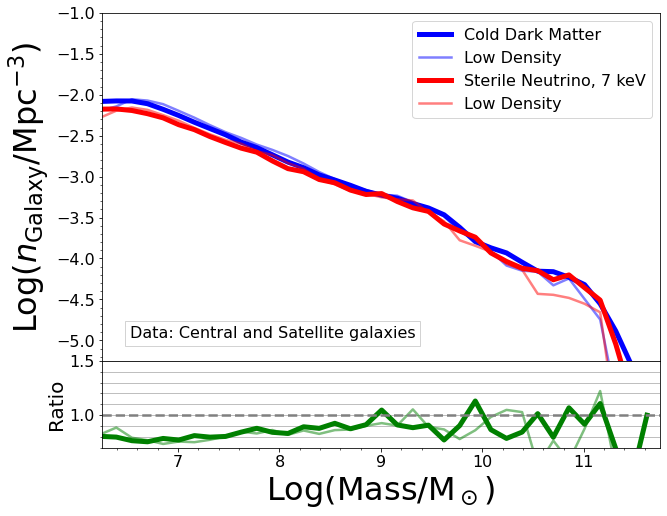

In [19]:
# line plot of histogram

volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm_top), label = "Cold Dark Matter",  
           linewidth = 5, color = "blue")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm_low), label='Low Density',
           linewidth = 2.5, color = "blue", alpha=0.5)
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm_top), label = "Sterile Neutrino, 7 keV",  
           linewidth = 5, color = "red")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm_low), label='Low Density',
           linewidth = 2.5, color = "red", alpha=0.5)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm_top/n_cdm_top, linewidth = 5, color = "green")
grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm_low/n_cdm_low, linewidth = 2.5, color = "green",alpha=0.5)
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.show()

### Try adding error bars!

In [20]:
volume = 100.0**3 #Mpc^3

# Compute Poisson errors in each bin
errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low=[],[],[],[]
low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low=[],[],[],[]
up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low=[],[],[],[]

for n, errors, N, low_lim, up_lim in zip([n_cdm_top, n_cdm_low, n_wdm_top, n_wdm_low],
                                         [errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low],
                                         [N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low], 
                                         [low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low],
                                         [up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low]):
    
    for i in range(len(n)):
        errors.append(stats.poisson_err(N[i]))

    # Turn into a numpy array
    errLow = np.log10(np.array(errors)[:,0] / volume)
    errHigh = np.log10(np.array(errors)[:,1]/ volume)

    # The plt.errorbar module needs yerr to be inserted as a 
    # relative difference to the y-value of the coordinate.
    low_lim.append(np.log10(n) - errLow)
    up_lim.append(errHigh - np.log10(n))

    # And now plot the result
    print(low_lim, up_lim)

[array([0.00479394, 0.00479655, 0.00476259, 0.00476487, 0.0049525 ,
       0.00536142, 0.00585   , 0.00643762, 0.00703973, 0.00768922,
       0.00853415, 0.00922672, 0.01022476, 0.01134161, 0.01228746,
       0.01362037, 0.01464894, 0.01580454, 0.01720286, 0.01821087,
       0.01899552, 0.02050924, 0.02188676, 0.02414275, 0.02897929,
       0.03565128, 0.03908531, 0.04212945, 0.0483756 , 0.05528192,
       0.05570779, 0.06057506, 0.06741539, 0.09030247, 0.13871664,
       0.24479764, 0.76581752,        nan,        nan])] [array([0.0047416 , 0.00474416, 0.00471093, 0.00471316, 0.00489666,
       0.00529604, 0.00577224, 0.00634358, 0.00692744, 0.00755544,
       0.00836967, 0.00903476, 0.00998956, 0.01105294, 0.01194935,
       0.01320617, 0.01417091, 0.01524953, 0.01654732, 0.01747788,
       0.01819938, 0.01958423, 0.02083648, 0.02287102, 0.02716595,
       0.03294538, 0.03585634, 0.03840158, 0.0435231 , 0.04903297,
       0.04936762, 0.05315104, 0.0668081 , 0.08891917, 0.13422859,
   

C:\Users\demiss shiferaw\OneDrive\Astro_98\Astro_98\stats.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\demiss shiferaw\OneDrive\Astro_98\Astro_98\stats.py:27: RuntimeWarning: invalid value encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


In [21]:
def giveratio(dn_a, dn_b, err_a, err_b, volume):
    
    # Turn into a numpy array
    err_a_low=np.array(err_a)[:,0]/volume
    err_a_high=np.array(err_a)[:,1]/volume
    err_b_low=np.array(err_b)[:,0]/volume
    err_b_high=np.array(err_b)[:,1]/volume
    
    # Ratio and errors of mf_a / mf_b
    ratio = dn_a / dn_b
    rel_a_low, rel_a_high = (dn_a-err_a_low) / dn_a, (err_a_high-dn_a) / dn_a
    rel_b_low, rel_b_high = (dn_b-err_b_low) /dn_b, (err_b_high-dn_b) / dn_b
    err_ratio_low = ratio * np.sqrt(rel_a_low**2 + rel_b_low**2)
    err_ratio_high = ratio * np.sqrt(rel_a_high**2 + rel_b_high**2)
    
    return ratio, err_ratio_low, err_ratio_high

In [22]:
ratio_top, low_lim_ratio_top, up_lim_ratio_top = giveratio(n_wdm_top, n_cdm_top, errors_wdm_top, 
                                                           errors_cdm_top, volume)
ratio_low, low_lim_ratio_low, up_lim_ratio_low = giveratio(n_wdm_low, n_cdm_low, errors_wdm_low, 
                                                           errors_cdm_low, volume)

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [23]:
low_lim_cdm_top=low_lim_cdm_top[0]
low_lim_cdm_low=low_lim_cdm_low[0]
low_lim_wdm_top=low_lim_wdm_top[0]
low_lim_wdm_low=low_lim_wdm_low[0]

up_lim_cdm_top=up_lim_cdm_top[0]
up_lim_cdm_low=up_lim_cdm_low[0]
up_lim_wdm_top=up_lim_wdm_top[0]
up_lim_wdm_low=up_lim_wdm_low[0]

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


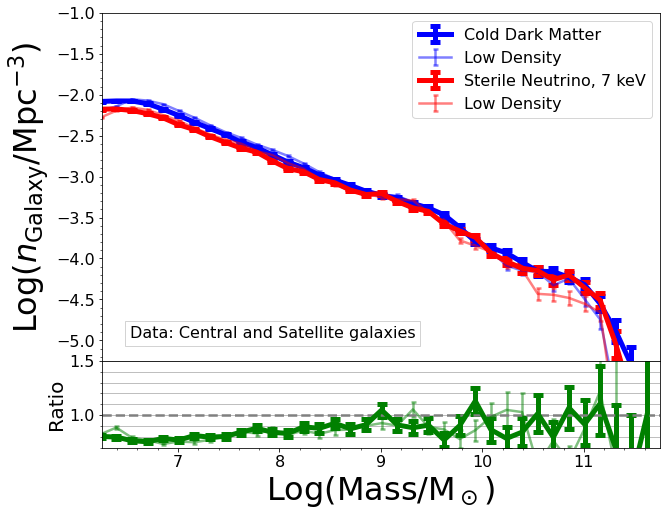

In [24]:
# line plot of histogram

volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm_top),yerr=[low_lim_cdm_top,up_lim_cdm_top],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm_low),yerr = [low_lim_cdm_low,up_lim_cdm_low],
               capsize = 2.5,capthick = 2.5,label = "Low Density",linewidth = 2.5, color = "blue",alpha = 0.5)
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm_top),yerr = [low_lim_wdm_top,up_lim_wdm_top],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm_low),yerr = [low_lim_wdm_low,up_lim_wdm_low],
               capsize = 2.5,capthick = 2.5,label = "Low Density",linewidth = 2.5, color = "red",alpha = 0.5)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_top, yerr = [low_lim_ratio_top, up_lim_ratio_top], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_low, yerr = [low_lim_ratio_low, up_lim_ratio_low], 
               capsize = 2.5, capthick = 2.5, linewidth = 2.5, color = "green", alpha = 0.5)
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig('Images/Summer2020/SMF.pdf')
plt.show()

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


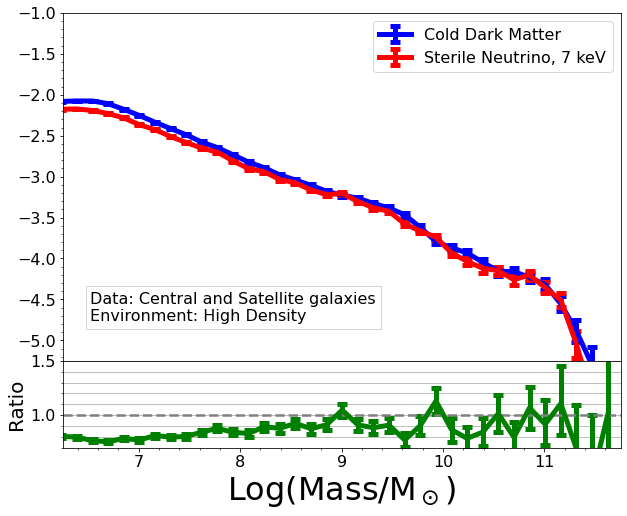

In [25]:
# line plot of histogram

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm_top/volume
n_wdm = N_wdm_top/volume

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Environment: High Density'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm),yerr=[low_lim_cdm_top,up_lim_cdm_top],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm),yerr = [low_lim_wdm_top,up_lim_wdm_top],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_top, yerr = [low_lim_ratio_top, up_lim_ratio_top], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig('Images/Summer2020/SMF_High.pdf')
plt.show()

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


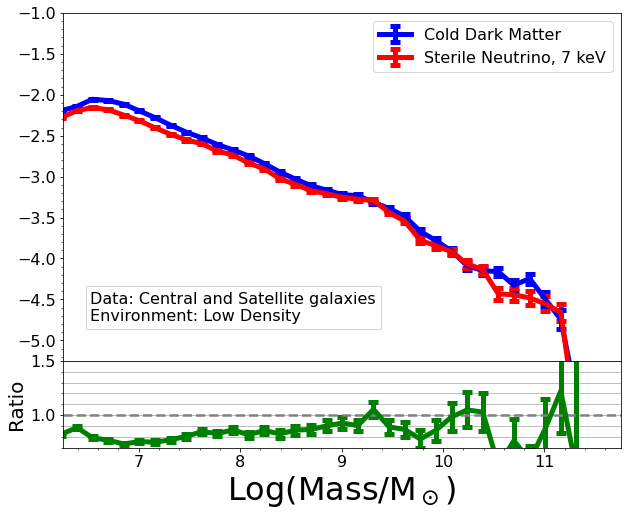

In [26]:
# line plot of histogram
volume = 100.0**3 #Mpc^3
n_cdm = N_cdm_low/volume
n_wdm = N_wdm_low/volume

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Environment: Low Density'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_cdm),yerr=[low_lim_cdm_low,up_lim_cdm_low],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])),np.log10(n_wdm),yerr = [low_lim_wdm_low,up_lim_wdm_low],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio_low, yerr = [low_lim_ratio_low, up_lim_ratio_low], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig('Images/Summer2020/SMF_Low.pdf')
plt.show()

### Total galaxies > 10$^9$ M$_\odot$ in the least dense environments

In [27]:
print('CDM:',np.sum(N_cdm_low[bins[:-1]>10**9]))
print('WDM:',np.sum(N_wdm_low[bins[:-1]>10**9]))

CDM: 2688.0
WDM: 2437.0


### Total galaxies > 10$^9$ M$_\odot$ in the most dense environments

In [28]:
print('CDM:',np.sum(N_cdm_top[bins[:-1]>10**9]))
print('WDM:',np.sum(N_wdm_top[bins[:-1]>10**9]))

CDM: 2808.0
WDM: 2513.0


# Compute the Cumulative Stellar Mass Function

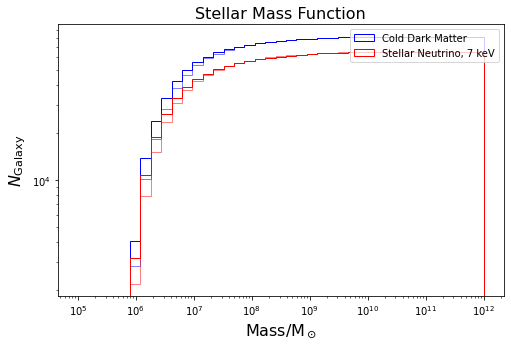

In [29]:
# Create a histogram
bins = np.logspace(5, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_galaxy_mass_filtered,label='Cold Dark Matter',color='blue',
                                                bins=bins, log = True, histtype = 'step', cumulative = 'True')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_galaxy_mass_filtered,color='blue', log = True,bins=bins,
                                                histtype = 'step',alpha=0.5, cumulative = 'True')
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_galaxy_mass_filtered,label='Stellar Neutrino, 7 keV',
                                                bins=bins, color='red', log = True, histtype = 'step', cumulative = 'True')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_galaxy_mass_filtered,color='red',bins=bins, log = True, 
                                                histtype = 'step',alpha=0.5, cumulative = 'True')
plt.title("Stellar Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Galaxy}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()

plt.show()

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


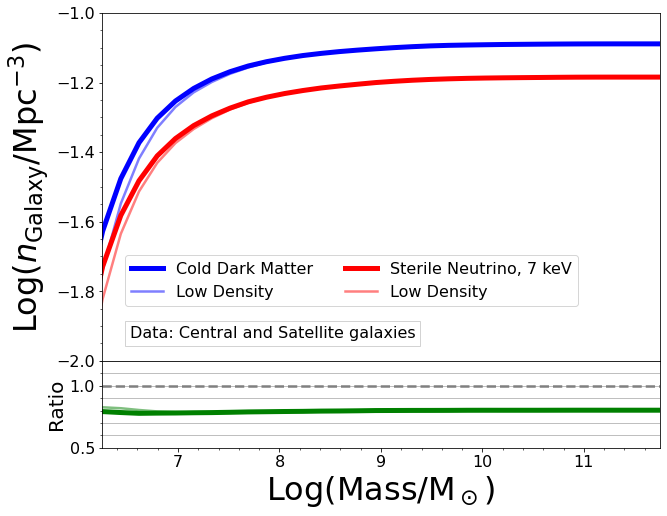

In [30]:
# line plot of histogram

volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(bins[:-1]), np.log10(n_cdm_top), label = "Cold Dark Matter",  
           linewidth = 5, color = "blue")
grid0.plot(np.log10(bins[:-1]), np.log10(n_cdm_low), label='Low Density',
           linewidth = 2.5, color = "blue", alpha=0.5)
grid0.plot(np.log10(bins[:-1]), np.log10(n_wdm_top), label = "Sterile Neutrino, 7 keV",  
           linewidth = 5, color = "red")
grid0.plot(np.log10(bins[:-1]), np.log10(n_wdm_low), label='Low Density',
           linewidth = 2.5, color = "red", alpha=0.5)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16,loc=[0.0405,0.1575],ncol=2) # [0.09,0.17] [0.15, 0.175] 
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-2, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.plot(np.log10(bins[:-1]), n_wdm_top/n_cdm_top, linewidth = 5, color = "green")
grid1.plot(np.log10(bins[:-1]), n_wdm_low/n_cdm_low, linewidth = 2.5, color = "green",alpha=0.5)
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.2)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.show()

### Try adding error bars!

In [31]:
volume = 100.0**3 #Mpc^3

# Compute Poisson errors in each bin
errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low=[],[],[],[]
low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low=[],[],[],[]
up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low=[],[],[],[]

for n, errors, N, low_lim, up_lim in zip([n_cdm_top, n_cdm_low, n_wdm_top, n_wdm_low],
                                         [errors_cdm_top,errors_cdm_low,errors_wdm_top,errors_wdm_low],
                                         [N_cdm_top, N_cdm_low, N_wdm_top, N_wdm_low], 
                                         [low_lim_cdm_top,low_lim_cdm_low,low_lim_wdm_top,low_lim_wdm_low],
                                         [up_lim_cdm_top,up_lim_cdm_low,up_lim_wdm_top,up_lim_wdm_low]):
    
    for i in range(len(n)):
        errors.append(stats.poisson_err(N[i]))

    # Turn into a numpy array
    errLow = np.log10(np.array(errors)[:,0] / volume)
    errHigh = np.log10(np.array(errors)[:,1]/ volume)

    # The plt.errorbar module needs yerr to be inserted as a 
    # relative difference to the y-value of the coordinate.
    low_lim.append(np.log10(n) - errLow)
    up_lim.append(errHigh - np.log10(n))

    # And now plot the result
    print(low_lim, up_lim)

[array([       nan,        nan,        nan,        nan,        nan,
       0.00682935, 0.00370982, 0.00283819, 0.00238313, 0.00211526,
       0.00194996, 0.0018421 , 0.00176693, 0.00171205, 0.00167142,
       0.0016401 , 0.00161697, 0.00159886, 0.00158423, 0.00157304,
       0.00156369, 0.00155604, 0.00154935, 0.00154332, 0.00153841,
       0.00153436, 0.00153164, 0.00152995, 0.00152852, 0.00152726,
       0.00152644, 0.00152565, 0.00152502, 0.00152453, 0.00152427,
       0.00152414, 0.00152413, 0.00152413, 0.00152413])] [array([       inf,        inf,        inf,        inf,        inf,
       0.00672362, 0.0036784 , 0.00281976, 0.00237012, 0.00210501,
       0.00194125, 0.00183432, 0.00175977, 0.00170533, 0.00166501,
       0.00163393, 0.00161097, 0.00159299, 0.00157847, 0.00156736,
       0.00155808, 0.00155048, 0.00154384, 0.00153786, 0.00153297,
       0.00152895, 0.00152626, 0.00152458, 0.00152316, 0.00152191,
       0.0015211 , 0.00152031, 0.00151968, 0.0015192 , 0.00151893,
   

C:\Users\demiss shiferaw\OneDrive\Astro_98\Astro_98\stats.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\demiss shiferaw\OneDrive\Astro_98\Astro_98\stats.py:27: RuntimeWarning: invalid value encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


In [32]:
ratio_top, low_lim_ratio_top, up_lim_ratio_top = giveratio(n_wdm_top, n_cdm_top, errors_wdm_top, 
                                                           errors_cdm_top, volume)
ratio_low, low_lim_ratio_low, up_lim_ratio_low = giveratio(n_wdm_low, n_cdm_low, errors_wdm_low, 
                                                           errors_cdm_low, volume)

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [33]:
low_lim_cdm_top=low_lim_cdm_top[0]
low_lim_cdm_low=low_lim_cdm_low[0]
low_lim_wdm_top=low_lim_wdm_top[0]
low_lim_wdm_low=low_lim_wdm_low[0]

up_lim_cdm_top=up_lim_cdm_top[0]
up_lim_cdm_low=up_lim_cdm_low[0]
up_lim_wdm_top=up_lim_wdm_top[0]
up_lim_wdm_low=up_lim_wdm_low[0]

C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\demiss shiferaw\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


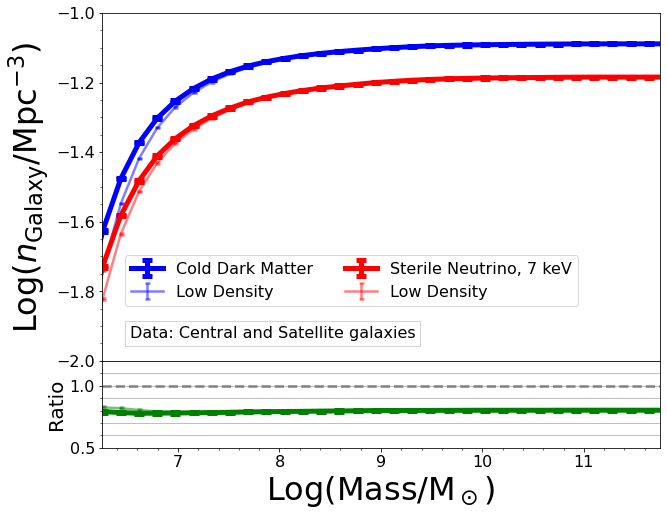

In [34]:
# line plot of histogram

volume = 100.0**3 #Mpc^3
n_cdm_top = N_cdm_top/volume
n_cdm_low = N_cdm_low/volume
n_wdm_top = N_wdm_top/volume
n_wdm_low = N_wdm_low/volume

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.errorbar(np.log10(bins[:-1]),np.log10(n_cdm_top),yerr=[low_lim_cdm_top,up_lim_cdm_top],
               capsize = 5,capthick = 5,label = "Cold Dark Matter",linewidth = 5,color = "blue")
grid0.errorbar(np.log10(bins[:-1]),np.log10(n_cdm_low),yerr = [low_lim_cdm_low,up_lim_cdm_low],
               capsize = 2.5,capthick = 2.5,label = "Low Density",linewidth = 2.5, color = "blue",alpha = 0.5)
grid0.errorbar(np.log10(bins[:-1]),np.log10(n_wdm_top),yerr = [low_lim_wdm_top,up_lim_wdm_top],
               capsize = 5,capthick = 5,label = "Sterile Neutrino, 7 keV",linewidth = 5,color = "red")
grid0.errorbar(np.log10(bins[:-1]),np.log10(n_wdm_low),yerr = [low_lim_wdm_low,up_lim_wdm_low],
               capsize = 2.5,capthick = 2.5,label = "Low Density",linewidth = 2.5, color = "red",alpha = 0.5)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16,loc=[0.0405,0.1575],ncol=2) # [0.09,0.17] [0.15, 0.175] 
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-2, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(bins[:-1]), ratio_top, yerr = [low_lim_ratio_top, up_lim_ratio_top], 
               capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid1.errorbar(np.log10(bins[:-1]), ratio_low, yerr = [low_lim_ratio_low, up_lim_ratio_low], 
               capsize = 2.5, capthick = 2.5, linewidth = 2.5, color = "green", alpha = 0.5)
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.2)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig('Images/Summer2020/CSMF.pdf')
plt.show()